In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Load classification report CSV files into DataFrames
df_log = pd.read_csv('classification_report/classification_report_logistic.csv', index_col=0)
df_rf = pd.read_csv('classification_report/classification_report_rf.csv', index_col=0)
df_gb = pd.read_csv('classification_report/classification_report_gb.csv', index_col=0)
df_bst = pd.read_csv('classification_report/classification_report_bst.csv', index_col=0)

# Add a column to identify the model
df_log['Model'] = 'Logistic Regression'
df_rf['Model'] = 'Random Forest'
df_gb['Model'] = 'Gradient Boosting'
df_bst['Model'] = 'XGBoost'

# Concatenate all DataFrames
df_all = pd.concat([df_log, df_rf, df_gb, df_bst])

# Reset index to use Category as a column
df_all.reset_index(inplace=True)

# Melt the DataFrame for easier plotting
df_melted = pd.melt(df_all, id_vars=['index', 'Model'], value_vars=['precision', 'recall', 'f1-score'], var_name='Metric', value_name='Value')

# Rename index to Category
df_melted.rename(columns={'index': 'Category'}, inplace=True)


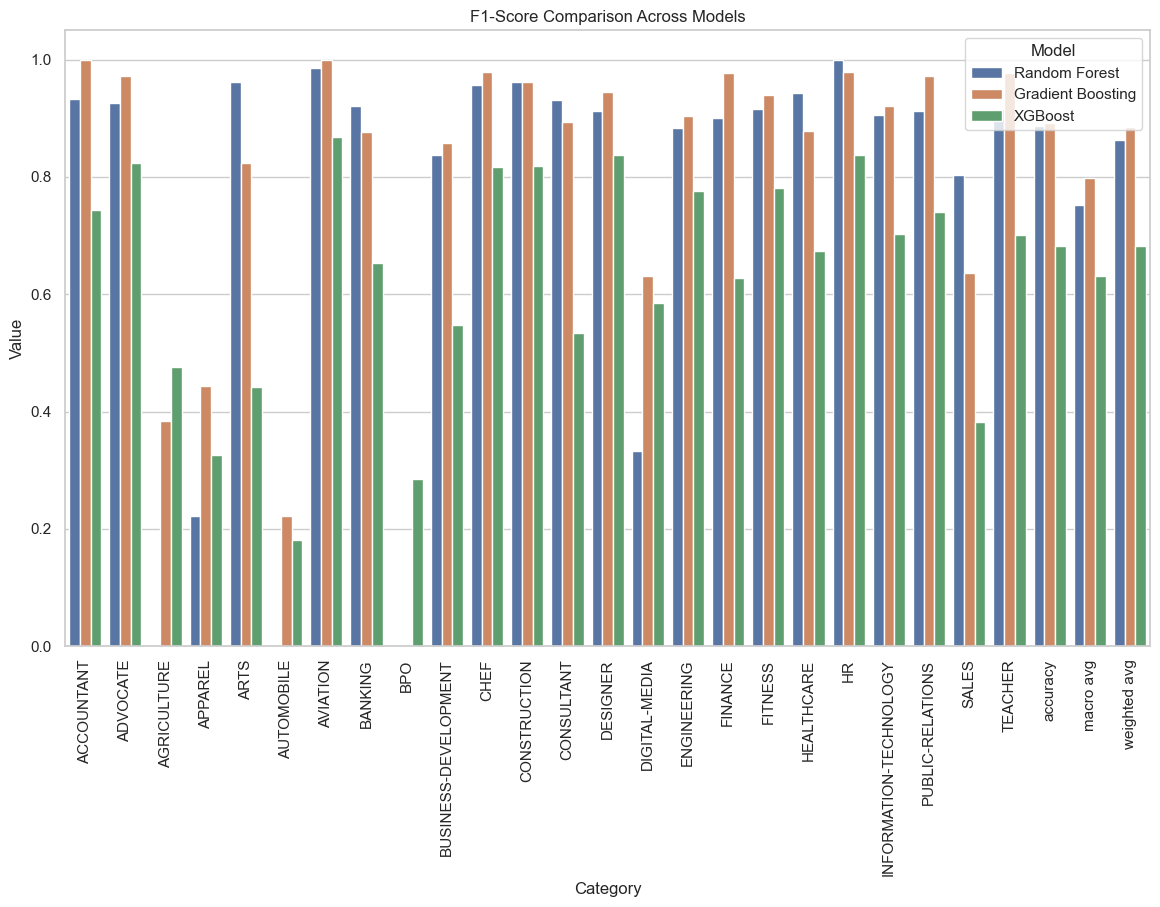

In [13]:
# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Category', y='Value', hue='Model', data=df_melted[df_melted['Metric'] == 'f1-score'])
plt.xticks(rotation=90)
plt.title('F1-Score Comparison Across Models')
plt.show()